# Exploratory Data Analysis

# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from downcast import reduce
from matplotlib import dates
import os

# 2. Load the Data

In [2]:
df = pd.read_csv('../Data/data_cleaned.csv')

In [3]:
df.head()

,id,item_id,dept_id_x,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,4.50
1,HOBBIES_1_004_CA_2_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_2,CA,d_1,6,2011-01-29,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,4.34
2,HOBBIES_1_004_CA_3_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_3,CA,d_1,0,2011-01-29,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,4.50
3,HOBBIES_1_004_CA_4_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_4,CA,d_1,1,2011-01-29,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,4.34
4,HOBBIES_1_004_TX_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_1,TX,d_1,1,2011-01-29,11101,...,1,2011,no_event,no_event,no_event,no_event,0,0,0,4.34


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853780 entries, 0 to 5853779
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id_x     object 
 3   cat_id        object 
 4   store_id      object 
 5   state_id      object 
 6   d             object 
 7   sales         int64  
 8   date          object 
 9   wm_yr_wk      int64  
 10  weekday       object 
 11  wday          int64  
 12  month         int64  
 13  year          int64  
 14  event_name_1  object 
 15  event_type_1  object 
 16  event_name_2  object 
 17  event_type_2  object 
 18  snap_CA       int64  
 19  snap_TX       int64  
 20  snap_WI       int64  
 21  sell_price    float64
dtypes: float64(1), int64(8), object(13)
memory usage: 982.5+ MB


In [5]:
#  Reduce pandas data-frame size using downcast.
df = reduce(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853780 entries, 0 to 5853779
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            category      
 1   item_id       category      
 2   dept_id_x     category      
 3   cat_id        category      
 4   store_id      category      
 5   state_id      category      
 6   d             category      
 7   sales         int16         
 8   date          datetime64[ns]
 9   wm_yr_wk      int16         
 10  weekday       category      
 11  wday          int8          
 12  month         int8          
 13  year          int16         
 14  event_name_1  category      
 15  event_type_1  category      
 16  event_name_2  category      
 17  event_type_2  category      
 18  snap_CA       int8          
 19  snap_TX       int8          
 20  snap_WI       int8          
 21  sell_price    float16       
dtypes: category(12), datetime64[ns](1), float16(1), int16(3), int8(5)


# 3. Sales Trends

## 2.1. Daily sales pattern

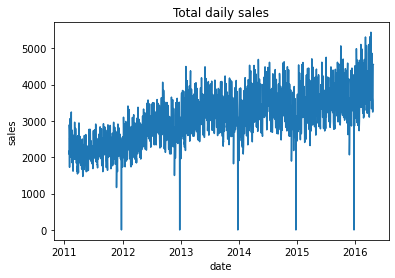

In [8]:
sns.lineplot(data = df.groupby('date').sum()['sales']).set(title='Total daily sales');


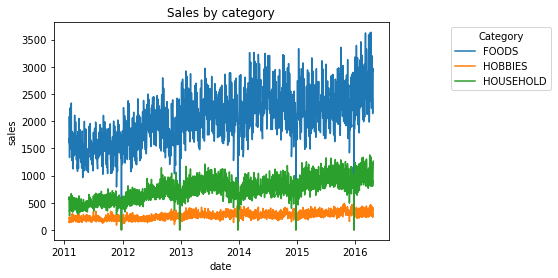

In [12]:
g1 = sns.lineplot(data=df.groupby(['date','cat_id']).sum()['sales'].reset_index(), 
            y='sales',x='date',hue='cat_id');
g1.set(title='Sales by category');
g1.legend(title='Category',loc='upper right',bbox_to_anchor=(1.5, 1));

In [9]:
# Note that this dataset is staring from 2011-1-29 to 2016-4-24.

sales_year = df.groupby('year').sum()['sales'].reset_index()
sales_year

,year,sales
0,2011,732534.0
1,2012,970187.0
2,2013,1149206.0
3,2014,1197007.0
4,2015,1261437.0
5,2016,441657.0


In [10]:
# Check sales on Christmas
df[df['event_name_1']=='Christmas']['sales'].unique()

array([0, 1], dtype=int16)

In [11]:
df[(df['event_name_1']=='Christmas')&(df['sales']==1)]

,id,item_id,dept_id_x,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
1012721,FOODS_3_755_CA_2_validation,FOODS_3_755,FOODS_3,FOODS,CA_2,CA,d_331,1,2011-12-25,11148,...,12,2011,Christmas,National,no_event,no_event,0,0,0,1.179688


1. Total daily sales are increasing over the year.  
2. There are huge drops in sales around the end of the year.  This is because all sales records are zero at Christmas except for one case. 


## 2.2. Sales by State, Store and Category

In [50]:
# Total sales by state

df_total_sales = df.groupby(['state_id']).sum()['sales'].reset_index()
df_total_sales

,state_id,sales
0,CA,2547042.0
1,TX,1609224.0
2,WI,1595762.0


In [73]:
print('The total sales per store' '\n' 
      'CA:',df_total_sales.loc[0,'sales']/4 )
print('TX:',df_total_sales.loc[1,'sales']/3)
print('WI:',round(df_total_sales.loc[2,'sales']/3,1))

The total sales per store
CA: 636760.5
TX: 536408.0
WI: 531920.7


In [13]:
# Total sales by store

df.groupby('store_id').sum()['sales'].reset_index()

,store_id,sales
0,CA_1,710960.0
1,CA_2,513970.0
2,CA_3,950934.0
3,CA_4,371178.0
4,TX_1,480976.0
5,TX_2,611360.0
6,TX_3,516888.0
7,WI_1,447667.0
8,WI_2,592758.0
9,WI_3,555337.0


In [14]:
# Total sales by category

df.groupby(['cat_id']).sum()['sales'].reset_index()

,cat_id,sales
0,FOODS,3852409.0
1,HOBBIES,497894.0
2,HOUSEHOLD,1401725.0


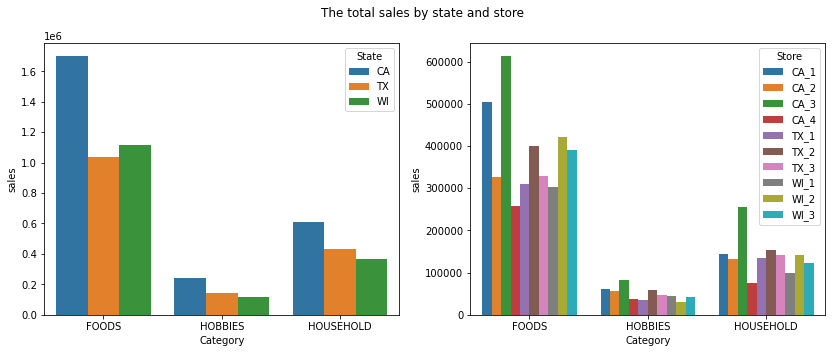

In [13]:
# The total sales by store and category

fig, axes = plt.subplots(1, 2, figsize=(14,5))

fig.suptitle('The total sales by state and store')

sns.barplot(ax=axes[0], data=df.groupby(['cat_id','state_id']).sum()['sales'].reset_index(),
            y='sales', x = 'cat_id',hue ='state_id');

sns.barplot(ax=axes[1],data=df.groupby(['cat_id','store_id']).sum()['sales'].reset_index(),
            y='sales', x = 'cat_id',hue ='store_id')

axes[0].set(xlabel='Category');
axes[1].set(xlabel='Category');
axes[0].legend(title='State');
axes[1].legend(title='Store');

In [34]:
# The average percentage of sales by category
sales_per = df.groupby(['cat_id']).sum()['sales']/test['sales'].sum()
sales_per

cat_id
FOODS        0.669748
HOBBIES      0.086560
HOUSEHOLD    0.243692
Name: sales, dtype: float64

In [49]:
# The percentage of product sales by category
df_sales_store = df.groupby(['store_id','cat_id']).sum()['sales'].reset_index()
df_sales_store['%'] = test['sales']/test.groupby('store_id')['sales'].transform('sum')
df_sales_store

,store_id,cat_id,sales,%
0,CA_1,FOODS,504962.0,0.710254
1,CA_1,HOBBIES,62123.0,0.087379
2,CA_1,HOUSEHOLD,143875.0,0.202367
3,CA_2,FOODS,325834.0,0.633955
4,CA_2,HOBBIES,56118.0,0.109185
5,CA_2,HOUSEHOLD,132018.0,0.256859
6,CA_3,FOODS,613187.0,0.644826
7,CA_3,HOBBIES,83008.0,0.087291
8,CA_3,HOUSEHOLD,254739.0,0.267883
9,CA_4,FOODS,257096.0,0.692649


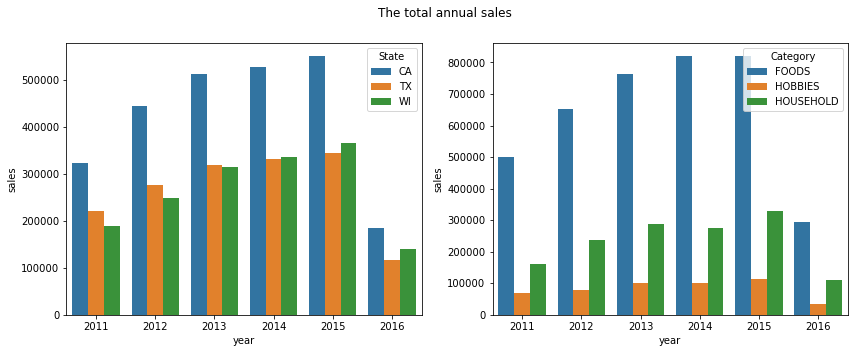

In [16]:
# The total annual sales by state and category

fig, axes = plt.subplots(1, 2, figsize=(14,5))

fig.suptitle('The total annual sales')

sns.barplot(ax=axes[0], data=df.groupby(['state_id','year']).sum()['sales'].reset_index(), 
            y='sales',x='year',hue='state_id');

sns.barplot(ax=axes[1],data=df.groupby(['cat_id','year']).sum()['sales'].reset_index(), 
            y='sales',x='year',hue='cat_id')

axes[0].legend(title='State')
axes[1].legend(title='Category');

1. California has outsold every year. The average sales per store in CA is 636,760. CA_3 has the highest sales, and CA_4 has the lowest among stores. Texas and Wisconsin have similar sales records, 536,408 and 531,920, respectively.  Sales in Texas were more than in Wisconsin before 2014; however, it was reversed after that.


2. In all states, food is the highest-selling product category.

## 2.3. Effect of the Day of the Week and Event on Sales

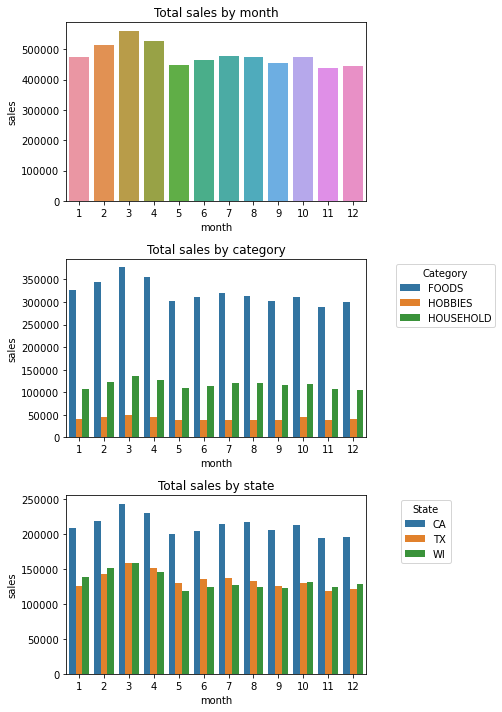

In [93]:
# Total sales by month

fig, axes = plt.subplots(3, 1, figsize=(8,10));

sns.barplot(ax=axes[0], data =df.groupby(['month']).sum()['sales'].reset_index(), 
            x='month',y='sales');

sns.barplot(ax=axes[1],data=df.groupby(['month','cat_id']).sum()['sales'].reset_index(),
            x='month',y='sales',hue='cat_id');

sns.barplot(ax=axes[2],data=df.groupby(['month','state_id']).sum()['sales'].reset_index(),
            x='month',y='sales',hue='state_id');

axes[0].set(title='Total sales by month')
axes[1].set(title='Total sales by category')
axes[2].set(title='Total sales by state')
axes[1].legend(title='Category',loc='upper right',bbox_to_anchor=(1.45, 1));

axes[2].legend(title='State',loc='upper right',bbox_to_anchor=(1.3, 1))
fig.tight_layout()

1. The sales in the first quarter are much higher than the rest of the year. This pattern is most marked in CA.

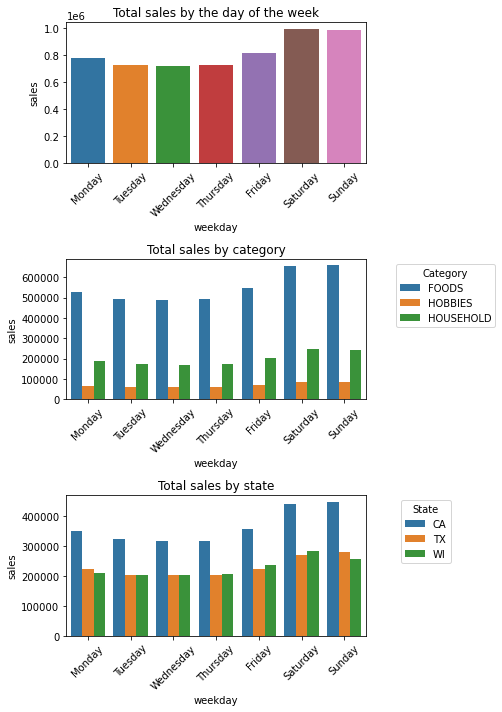

In [97]:
# Total sales by the day of the week
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


fig, axes = plt.subplots(3, 1, figsize=(8,10));

sns.barplot(ax=axes[0], data =df.groupby(['weekday']).sum()['sales'].reset_index(), 
            x='weekday',y='sales',order=day);

sns.barplot(ax=axes[1],data=df.groupby(['weekday','cat_id']).sum()['sales'].reset_index(), 
            x='weekday',y='sales',hue='cat_id',order=day);

sns.barplot(ax=axes[2],data=df.groupby(['weekday','state_id']).sum()['sales'].reset_index(), 
            x='weekday',y='sales',hue='state_id',order=day);

axes[0].set(title='Total sales by the day of the week')
axes[1].set(title='Total sales by category')
axes[2].set(title='Total sales by state')

axes[1].legend(title='Category',loc='upper right',bbox_to_anchor=(1.45, 1));
axes[2].legend(title='State',loc='upper right',bbox_to_anchor=(1.3, 1));

axes[0].tick_params('x', labelrotation=45)
axes[1].tick_params('x', labelrotation=45)
axes[2].tick_params('x', labelrotation=45)
fig.tight_layout()

1. The products have been sold more during the weekend.

In [116]:
# The lists of events in each event type

Cultural_Event =df[df['event_type_1']=='Cultural']['event_name_1'].unique().tolist()
National_Event =df[df['event_type_1']=='National']['event_name_1'].unique().tolist()
Religious_Event =df[df['event_type_1']=='Religious']['event_name_1'].unique().tolist()
Sporting_Event =df[df['event_type_1']=='Sporting']['event_name_1'].unique().tolist()

print('Cultural Event :',Cultural_Event )
print('National Event :',National_Event )
print('Religious Event :',Religious_Event )
print('Sporting Event :',Sporting_Event )

Cultural Event : ['ValentinesDay', 'StPatricksDay', 'Cinco De Mayo', "Mother's day", "Father's day", 'Halloween', 'Easter']
National Event : ['PresidentsDay', 'MemorialDay', 'IndependenceDay', 'LaborDay', 'ColumbusDay', 'VeteransDay', 'Thanksgiving', 'Christmas', 'NewYear', 'MartinLutherKingDay']
Religious Event : ['LentStart', 'LentWeek2', 'Purim End', 'OrthodoxEaster', 'Pesach End', 'Ramadan starts', 'Eid al-Fitr', 'EidAlAdha', 'Chanukah End', 'OrthodoxChristmas']
Sporting Event : ['SuperBowl', 'NBAFinalsStart', 'NBAFinalsEnd']


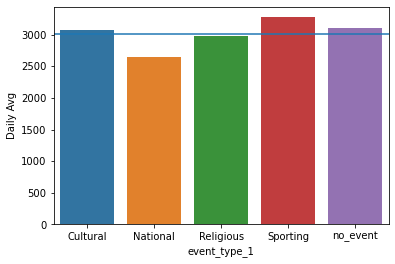

In [178]:
# impact of event on daily sales on the day of event.

Test = df.groupby(['year','event_type_1']).agg(sales=('sales',np.sum), days = ('sales',len))

Test['# of days'] = Test['days']/3060
Test['Daily Avg'] = Test['sales']/Test['# of days'] 
Test = Test.reset_index()

sns.barplot(data=Test.groupby('event_type_1').mean()['Daily Avg'].reset_index() , y = 'Daily Avg' , x = 'event_type_1');
plt.axhline(Test.groupby('year').mean()['Daily Avg'].mean());

In [181]:
# impact of event on sales during the week before
df_cal = df[['date','wm_yr_wk','weekday','wday','year','event_name_1',
             'event_type_1','event_name_2','event_type_2']].drop_duplicates(subset=['date'])
daily_sales = df.groupby('date').sum()[['sales']].reset_index()
df_event = pd.merge(df_cal,daily_sales, how = 'right', on = 'date')

Table = pd.pivot_table(df_event, index =['year','event_type_1','event_name_1'],
                       values=['sales','date'],aggfunc=np.sum)
Table = Table[Table['sales'] != 0].reset_index()

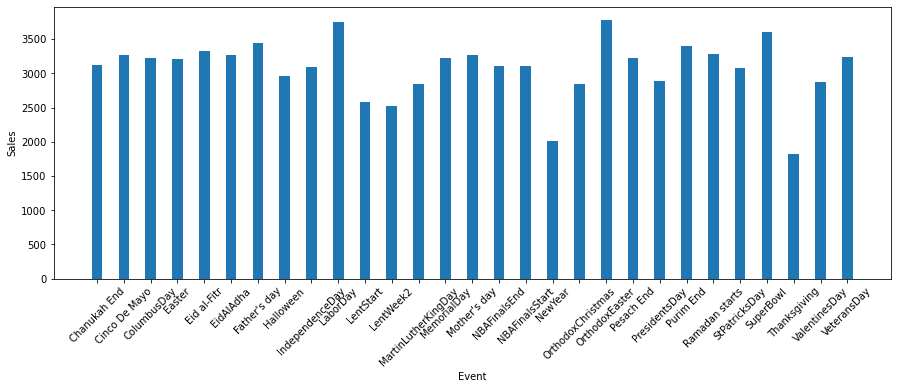

In [225]:
plot_table = Table[(Table['year']>2011) &(Table['year']<2016) & (Table['event_name_1'] !='no_event')]
plot_table = plot_table.groupby('event_name_1').mean()['sales'].dropna().reset_index()

fig = plt.figure(figsize = (15, 5))
 
plt.bar(plot_table['event_name_1'], plot_table['sales'], width = 0.4)
 
plt.xlabel('Event')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

## 2.4. SNAP purchases 

In [4]:
df_cal2 = df[['date','wm_yr_wk','weekday','wday','year','snap_CA','snap_TX','snap_WI']].drop_duplicates(subset=['date'])
daily_sales = df.groupby('date').sum()[['sales']].reset_index()
df_snap = pd.merge(df_cal2,daily_sales, how = 'right', on = 'date')

,date,wm_yr_wk,weekday,wday,year,snap_CA,snap_TX,snap_WI,sales
0,2011-01-29,11101,Saturday,1,2011,0,0,0,2877
1,2011-01-30,11101,Sunday,2,2011,0,0,0,2752
2,2011-01-31,11101,Monday,3,2011,0,0,0,2084
3,2011-02-01,11101,Tuesday,4,2011,1,1,0,2178
4,2011-02-02,11101,Wednesday,5,2011,1,0,1,1724
...,...,...,...,...,...,...,...,...,...
1908,2016-04-20,11612,Wednesday,5,2016,0,0,0,3251
1909,2016-04-21,11612,Thursday,6,2016,0,0,0,3245
1910,2016-04-22,11612,Friday,7,2016,0,0,0,3917
1911,2016-04-23,11613,Saturday,1,2016,0,0,0,4544


<AxesSubplot:xlabel='state', ylabel='sales'>

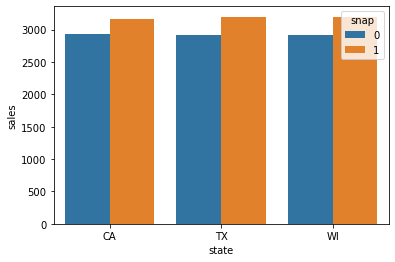

In [21]:
snap_ca = df_snap.groupby('snap_CA').mean()['sales'].reset_index().rename(columns = {'snap_CA':'snap'})
snap_tx = df_snap.groupby('snap_TX').mean()['sales'].reset_index().rename(columns = {'snap_TX':'snap'})
snap_wi = df_snap.groupby('snap_WI').mean()['sales'].reset_index().rename(columns = {'snap_WI':'snap'})

snap_ca['state']='CA'
snap_tx['state']='TX'
snap_wi['state']='WI'

plot_snap= snap_ca.append([snap_tx, snap_wi], ignore_index=True)

plot_snap

sns.barplot(data=plot_snap, x='state',y='sales' ,hue='snap')

1. Snap purchase has a positive effect on sales. Note that SANP purchase is allowed for ten days every month. But the dates allowed differ across states.

# 3. Price Trends

# 3. Trends in Price

<AxesSubplot:xlabel='date', ylabel='sell_price'>

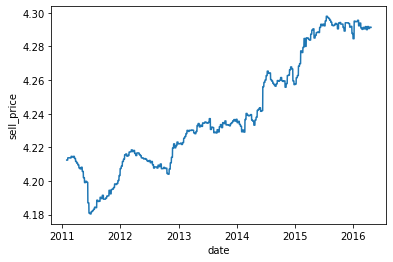

In [41]:
df_price=df.groupby(['date']).mean()['sell_price'].reset_index()
df_price['date'] = pd.to_datetime(df_price['date'])

sns.lineplot(data = df_price, x='date', y='sell_price');

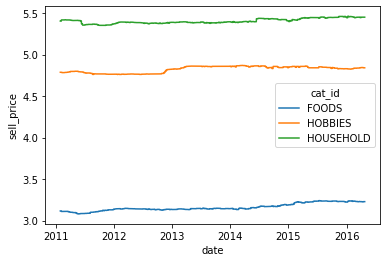

In [49]:
df_cat_price = df.groupby(['date','cat_id']).mean()['sell_price'].reset_index()
df_cat_price['date'] = pd.to_datetime(df_cat_price['date'])
sns.lineplot(data = df_cat_price, x='date', y='sell_price', hue='cat_id');


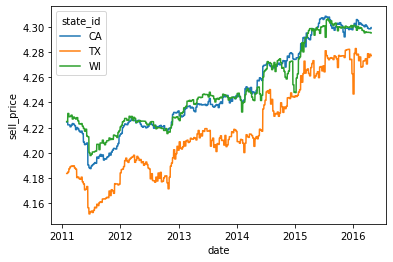

In [51]:
df_state_price = df.groupby(['date','state_id']).mean()['sell_price'].reset_index()
df_state_price['date'] = pd.to_datetime(df_state_price['date'])
sns.lineplot(data = df_state_price, x='date', y='sell_price', hue='state_id');

# 4. Summary